<a href="https://colab.research.google.com/github/maryamshahani/BuildingMyNueralNetwork/blob/main/StoryTeller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install PyPDF2

     |████████████████████████████████| 77 kB 3.2 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=7154ddb0e60017bcccb356964bcf82bb4e8e2baeea9bc0ba34e2f2257943b56a
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [2]:
#read-PDF imports here
import PyPDF2

In [3]:
#pre-processing imports here
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#file locations on drive
grimm_url = '/content/drive/MyDrive/GoogleColabFiles/StoryTeller/FairytalesByTheBrothersGrimm.txt'
coraline_url = '/content/drive/MyDrive/GoogleColabFiles/StoryTeller/Coraline.pdf'
alice_url = '/content/drive/MyDrive/GoogleColabFiles/StoryTeller/AlicesAdvanturesInWonderland.txt'

In [6]:
#load punctuation symbols
punct = string.punctuation

# **Pre-processing Coraline**

In [7]:
#a function to pre process Coraline by Neil Gaiman

def preprocess_coraline(book):
  '''
  param book: url od a PDF book file
  '''
  output = ""
  data = open(book, 'rb')
  data = PyPDF2.PdfFileReader(book)
  npages = data.getNumPages()
  for i in range(npages):
    page_i = data.getPage(i).extractText()
    output += page_i
  output = output[1227:]
  output = output.lower()
  for word in output:
    for char in word:
        if char in punct:
            word = word.replace(char, "")
  remove_punct = "".join([word for word in output if word not in punct])
  processed = word_tokenize(remove_punct)
  print('Coraline database includes {} tokens, and {} unique tokens after editing'.format(len(processed), len(set(processed)))) 
  return processed

coraline = preprocess_coraline(coraline_url) 

Coraline database includes 30835 tokens, and 3471 unique tokens after editing


## **Preprocessing Alice in Wonderland**

In [8]:
#a function to pre process Alice's Advantures in Wonderland by Lewis Carroll

def load_alice(text_file, punct, not_a_word):
    '''
    param text_file: url to Project Gutenberg's text file for Alice's Advantures in Wonderland by Lewis Carroll
    param punct: a string of punctuation characters we'd like to filter
    param not_a_word: a list of words we'd like to filter
    '''
    book = open(text_file, 'r')
    book = book.read()
    book = book[715:145060]
    book_edit = re.sub('[+]', '', book)
    book_edit = re.sub(r'(CHAPTER \w+.\s)', '', book)
    words = word_tokenize(book_edit.lower())
    
    word_list = []
    
    # filtering punctuation and non-words
    for word in words:
        for char in word:
            if char in punct:
                word = word.replace(char, "")
        if word not in punct and word not in not_a_word:
            word_list.append(word)

    print('Alice database includes {} tokens, and {} unique tokens after editing'.format(len(word_list), len(set(word_list)))) 
    return word_list

alice = load_alice(alice_url, (punct.replace('-', "") + '’' + '‘'), ['s', '--', 'nt', 've', 'll', 'd'])

Alice database includes 26612 tokens, and 2596 unique tokens after editing


# **Preprocessing Grimm**


In [9]:
def load_fairytales(text_file):
    '''
    param text_file: url to Project Gutenberg's text file for Fairytales by The Brothers Grimm
    '''
    book = open(text_file, encoding='cp1252')
    book = book.read()
    book = book[2376:519859]
    book_edit = re.sub('[(+*)]', '', book)
    words = word_tokenize(book_edit.lower())

    # filtering punctuation inside tokens (example: didn't or wow!)
    for word in words:
        for char in word:
            if char in punct:
                word = word.replace(char, "")

    # filtering punctuation as alone standing tokens(example: \ or ,)
    words = [word for word in words if word not in punct]

    print('Fairytales database includes {} tokens, and {} unique tokens after editing'.format(len(words), len(set(words))))            
    return words

brothers_grimm = load_fairytales(grimm_url)

Fairytales database includes 106324 tokens, and 5335 unique tokens after editing


# **Combined database including all books**

In [10]:
data = coraline + alice + brothers_grimm
data[:10]

['coraline',
 'discovered',
 'the',
 'door',
 'a',
 'little',
 'while',
 'after',
 'they',
 'moved']

# **Convert Data into Numeric Values cause Neural Network speaks Math rather than English**

In [11]:
vocab_size = len(data)
print(vocab_size)

vocab = set(data)
unique_vocab = len(vocab)
print(unique_vocab)


163771
7923


In [12]:
word_to_index = { word: i for i, word in enumerate(vocab)}
print(word_to_index)

{'sweater': 0, '3.': 1, 'drown': 2, 'distances': 3, 'mount': 4, 'well-a-day': 5, 'good-for-nothing': 6, 'hearse': 7, 'laughter': 8, 'mortal': 9, 'sob': 10, 'rowing': 11, 'hookah': 12, 'valley': 13, 'spotted': 14, 'gift': 15, 'circled': 16, 'expatiated': 17, 'foreign': 18, 'practice': 19, 'livonian': 20, 'interrupting': 21, 'panther': 22, 'moved': 23, 'wherein': 24, 'manner': 25, 'inwards': 26, 'beauti': 27, 'so': 28, 'discourse': 29, 'washing-bowl': 30, 'opposite': 31, 'pen': 32, 'money.': 33, 'pat': 34, 'flower-pot': 35, 'week': 36, 'slice': 37, 'sniffed': 38, 'angered': 39, 'pyramid': 40, 'create': 41, 'tempting': 42, 'statues': 43, 'weeping': 44, 'programmes': 45, 'splashing': 46, 'yet': 47, 'public-house': 48, 'pepper': 49, 'prying': 50, 'bowed': 51, 'gulp': 52, 'falada': 53, 'avoid': 54, 'tablet': 55, 'armchairs': 56, 'paper': 57, 'traveller': 58, 'goldenbrown': 59, 'labourers': 60, 'mankind': 61, 'biscuit': 62, 'together': 63, 'housework': 64, 'bag': 65, 'wheresoever': 66, 'eels'

In [13]:
data = [word_to_index[word] for word in data]
print(data[:10])

[4490, 1619, 5594, 7003, 465, 6109, 1376, 7469, 4011, 23]


In [14]:
#to test the match
print(word_to_index['coraline']) 
print(word_to_index['discovered'])

4490
1619


# **Batching Data (splitting data into Batches)**

In [15]:
batch_size = 5
#storing our features and targets inside the tuple
train_data = [([data[i], data[i+1], data[i+2], data[i+3], data[i+4]], data[i+5]) for i in range (vocab_size - batch_size)]
train_data[:10]

[([4490, 1619, 5594, 7003, 465], 6109),
 ([1619, 5594, 7003, 465, 6109], 1376),
 ([5594, 7003, 465, 6109, 1376], 7469),
 ([7003, 465, 6109, 1376, 7469], 4011),
 ([465, 6109, 1376, 7469, 4011], 23),
 ([6109, 1376, 7469, 4011, 23], 4425),
 ([1376, 7469, 4011, 23, 4425], 5594),
 ([7469, 4011, 23, 4425, 5594], 3298),
 ([4011, 23, 4425, 5594, 3298], 3904),
 ([23, 4425, 5594, 3298, 3904], 7348)]

# **Defining the Neural Network**

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

embedding_dim = 5

class StoryTeller(nn.Module):
  def __init__(self, vocab_size, embedding_dim, batch_size):
    super(StoryTeller,self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(batch_size * embedding_dim, 128) #first linear transformation
    self.linear2 = nn.Linear(128, 512) #we specified the output of previous layer in it
    self.linear3 = nn.Linear(512, vocab_size) #third linear transformation

  def forward(self, inputs):
    embeds = self.embeddings(inputs).view((1,-1))
    out = F.relu(self.linear1(embeds))
    out = F.relu(self.linear2(out))
    out = self.linear3(out)
    log_probs = F.log_softmax(out , dim=1) #log softmax method
    return log_probs

#test the model so far
model =  StoryTeller(vocab_size, embedding_dim, batch_size)  
model


StoryTeller(
  (embeddings): Embedding(163771, 5)
  (linear1): Linear(in_features=25, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=163771, bias=True)
)

# **Defining Training Function**

In [17]:
average_loss = []

def train(model, train_data, epochs, word_to_index): #An epoch is one itteration over the data
  if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("training on GPU...")
  else:
    device = torch.device("cpu")
    print("training on CPU...")

  model.to(device)

  for i in range(epochs):
    model.train()
    steps = 0
    print_every = 100
    running_loss = 0
    for feature,target in train_data:
      featuer_tensor = torch.tensor([feature], dtype=torch.long)
      featuer_tensor = featuer_tensor.to(device)
      target_tensor = torch.tensor([target], dtype=torch.long)
      target_tensor = target_tensor.to(device)
      model.zero_grad() #setting the gradiant to zero
      log_probs = model(featuer_tensor)
      loss = criterion(log_probs, target_tensor)
      loss.backward()
      optimizer.step() # .step() will update parameter to minimize our loss
      running_loss += loss.item() #add current loss item to running_loss
      steps += 1

      if steps % print_every == 0:
        model.eval()
        average_loss.append(running_loss/print_every)
        print("epochs : {} / {} ".format(i+1,epochs),
              "training loss : {:.3f}".format(running_loss/print_every))
        running_loss = 0
      model.train()
    return model




  


# **Train Model**

In [18]:
model =  StoryTeller(vocab_size, embedding_dim, batch_size)  
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #lr means learning rate

epochs = 10
device = 0

start_time = time.time()
model = train(model, train_data, epochs, word_to_index)

print("training took {} minutes".format(round((start_time - time.time())/60), 2))

training on GPU...
epochs : 1 / 10  training loss : 11.916
epochs : 1 / 10  training loss : 11.785
epochs : 1 / 10  training loss : 11.680
epochs : 1 / 10  training loss : 11.241
epochs : 1 / 10  training loss : 11.093
epochs : 1 / 10  training loss : 10.095
epochs : 1 / 10  training loss : 9.574
epochs : 1 / 10  training loss : 9.765
epochs : 1 / 10  training loss : 8.864
epochs : 1 / 10  training loss : 9.106
epochs : 1 / 10  training loss : 9.215
epochs : 1 / 10  training loss : 8.243
epochs : 1 / 10  training loss : 8.362
epochs : 1 / 10  training loss : 7.849
epochs : 1 / 10  training loss : 8.646
epochs : 1 / 10  training loss : 8.353
epochs : 1 / 10  training loss : 8.022
epochs : 1 / 10  training loss : 7.490
epochs : 1 / 10  training loss : 8.376
epochs : 1 / 10  training loss : 8.086
epochs : 1 / 10  training loss : 8.525
epochs : 1 / 10  training loss : 7.642
epochs : 1 / 10  training loss : 7.968
epochs : 1 / 10  training loss : 7.674
epochs : 1 / 10  training loss : 7.652


# **Save Checkpoint**

In [24]:
checkpoint_url = '/content/drive/MyDrive/GoogleColabFiles/StoryTeller/checkpoint3.pth'

checkpoint = {'model': model,
              'state_dict': model.state_dict(),
              'word_to_index': word_to_index,
              'index_to_word': {i: word for i, word in enumerate(vocab)},
              'epochs': epochs,
              'average_loss': average_loss,
              'device': device,
              'optimizer_state': optimizer.state_dict(),
              'batch_size': batch_size}

torch.save(checkpoint, checkpoint_url)

# **Load Checkpoint**

In [27]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.optimizer_state = checkpoint['optimizer_state']
    model.load_state_dict(checkpoint['state_dict'])
    model.device = checkpoint['device']
    model.word_to_index = checkpoint['word_to_index']
    model.index_to_word = checkpoint['index_to_word']
    model.average_loss = checkpoint['average_loss']
    return model

checkpoint_url = '/content/drive/MyDrive/GoogleColabFiles/StoryTeller/checkpoint3.pth'
model = load_checkpoint(checkpoint_url)
index_to_word = model.index_to_word
model

StoryTeller(
  (embeddings): Embedding(163771, 5)
  (linear1): Linear(in_features=25, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=163771, bias=True)
)

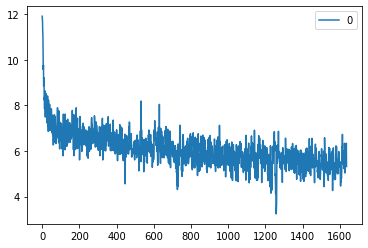

In [28]:
import pandas as pd

loss_plot = pd.DataFrame(model.average_loss)
loss_plot.plot()

# **Predict Function**

In [29]:
def predict(model, first_words ,story_len ,top_k):
    '''
    param model: trained model
    param first_words: a string of 5 (n_feature) words to begin the story
    param story_len: an integer symbolizing the number of words you'd like the story to have
    param top_k: the number of top probabilities per word that the network will randomly select from
    '''
    feature = (first_words.lower()).split(" ")
    for i in feature:
        story.append(i)
    for i in range(story_len):
        feature_idx = torch.tensor([word_to_index[word] for word in feature], dtype=torch.long)
        feature_idx = feature_idx.to(device)
        with torch.no_grad():
            output = model.double().forward(feature_idx)
        ps = torch.exp(output)
        topk_combined = ps.topk(top_k, sorted=True)
        #top kk probabilities
        topk_ps = topk_combined[0][0]
        #top kk classes
        topk_class = topk_combined[1][0]
        topk_class = [index_to_word[int(i)] for i in topk_class]
        next_word = random.choice(topk_class)
        feature = feature[1:]
        feature.append(next_word)
        story.append(next_word)
    return story

# **Predict**

In [30]:
import random
first_words = input('Type the first {} words to start the story:\nexample: A lovely day at the\n'.format(batch_size))

top_k = 3
story_len = 50
story = []
device = 'cuda:0'

#Predicting and Handling User-Input Errors
try:      
    prediction = predict(model, first_words, story_len, top_k)
except KeyError as error:
    print('Oops, looks like you\'ve selected a word that the network does not understand yet: ', error)
    if story[0] != "":
        story = story[len(first_words):]
    first_words = input('please select a different word:\nexample: A lovely day at the\n')
    prediction = predict(model, first_words, story_len, top_k)
except KeyError and RuntimeError:
    if story[0] != "":
        story = story[len(first_words):]
    first_words = input('Oops, looks like you\'ve typed {} words instead of {}!\n\nType the first 5 words to start the story:\nexample: A lovely day at the\n'.format(len(first_words.split(" ")), n_features))
    prediction = predict(model, first_words, story_len, top_k)

print('-----------------------------------------------------\n The STORY \n-----------------------------------------------------')
print(" ".join(story))

Type the first 5 words to start the story:
example: A lovely day at the
Once upon a time in
-----------------------------------------------------
 The STORY 
-----------------------------------------------------
once upon a time in the dwarf and the bear and he had with her face they took and he had and the bear was and he had and they had and they was and the two man to him ‘ you are the dwarf had not not have ’ then the bear took and
